<p style = "font-size : 50px; color : #393e46 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #00adb5; border-radius: 50px 10px;"><strong>DECISION_TREE_C5.0</strong></p>

In [1]:
# importing necessary liberaries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
plt.rcParams['figure.dpi'] = 250
sns.set_theme(style='darkgrid')
%matplotlib inline

# importing warnings liberary to ignore future warnings

import warnings
warnings.filterwarnings('ignore')

# model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

<p  style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Table of Contents</strong></p> 

In [2]:
df = pd.read_csv('Iris.csv', index_col=0)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [3]:
# descriptive analysis

df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# extracting all independent features name list

numeric_columns = df.select_dtypes(exclude=['object']).columns

print(f'independent features are: {numeric_columns.to_list()}')

independent features are: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [5]:
# number of unique values in each columns

for col in numeric_columns:
    numeric = df[col].nunique()
    print(f'{col} has {numeric} number of unique values')

SepalLengthCm has 35 number of unique values
SepalWidthCm has 23 number of unique values
PetalLengthCm has 43 number of unique values
PetalWidthCm has 22 number of unique values


In [6]:
# checking taget columns null values

df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [7]:
# unique species 
unique_target = df.Species.unique().tolist()
print('target_columns has {} unqiue values: {}'.format(len(unique_target), unique_target))

target_columns has 3 unqiue values: ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


In [8]:
# chechking for null values

df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
# checking for duplicated values

duplicates =  df.duplicated().sum()
print('there are {} duplicate values in the data.'.format(duplicates))

there are 3 duplicate values in the data.


In [10]:
# removing duplicated values

df.drop_duplicates(inplace=True)

In [11]:
# confirming duplicate value

duplicates =  df.duplicated().sum()
print('now there {} duplicated values in this data.'.format(duplicates))

now there 0 duplicated values in this data.


In [12]:
# detailed info of each columns along with datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  147 non-null    float64
 1   SepalWidthCm   147 non-null    float64
 2   PetalLengthCm  147 non-null    float64
 3   PetalWidthCm   147 non-null    float64
 4   Species        147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [13]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
numeric_columns = numeric_columns.tolist()
numeric_columns

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

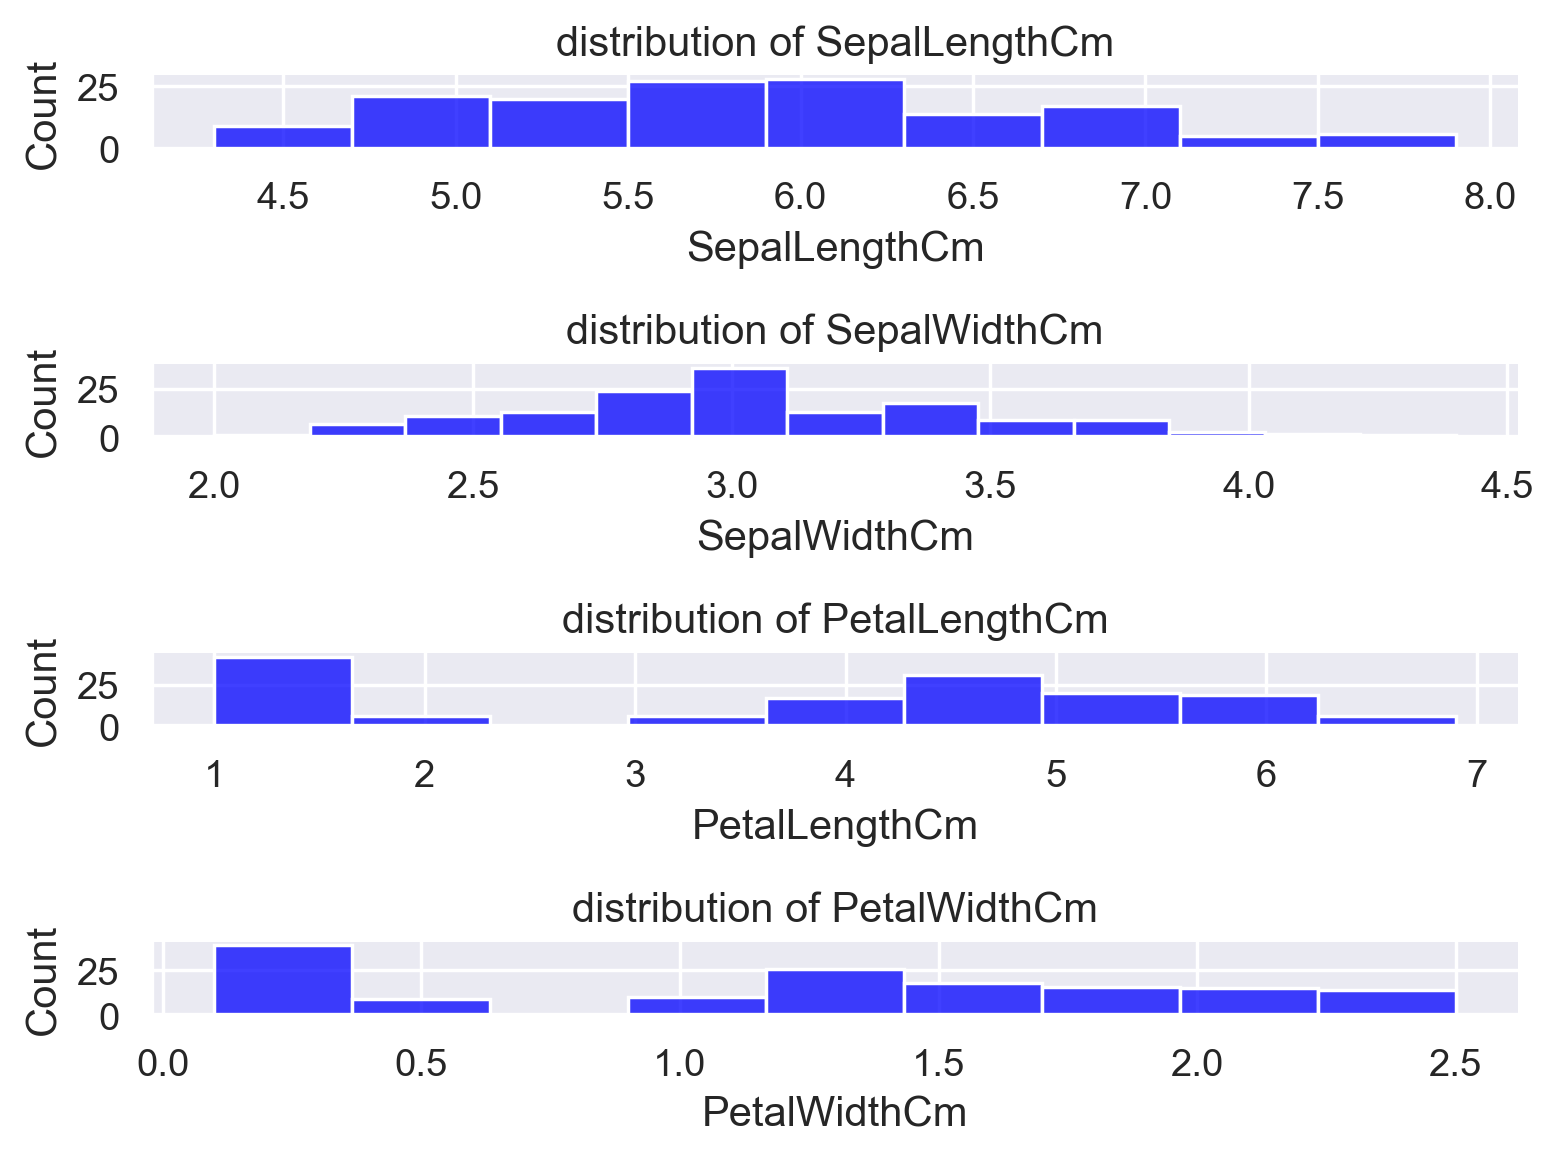

In [15]:
plt.figure(figure=(12, 20))

for i, col in enumerate(numeric_columns):
    plt.subplot(4, 1, i+1)
    sns.histplot(data=df, x=col, kde=False , color='blue')
    sns.despine()
    plt.title('distribution of {}'.format(col))
plt.tight_layout()

# Feature Engineering

In [16]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
# checking correlation bertween the columns

df.corr(numeric_only=True)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000


<Axes: >

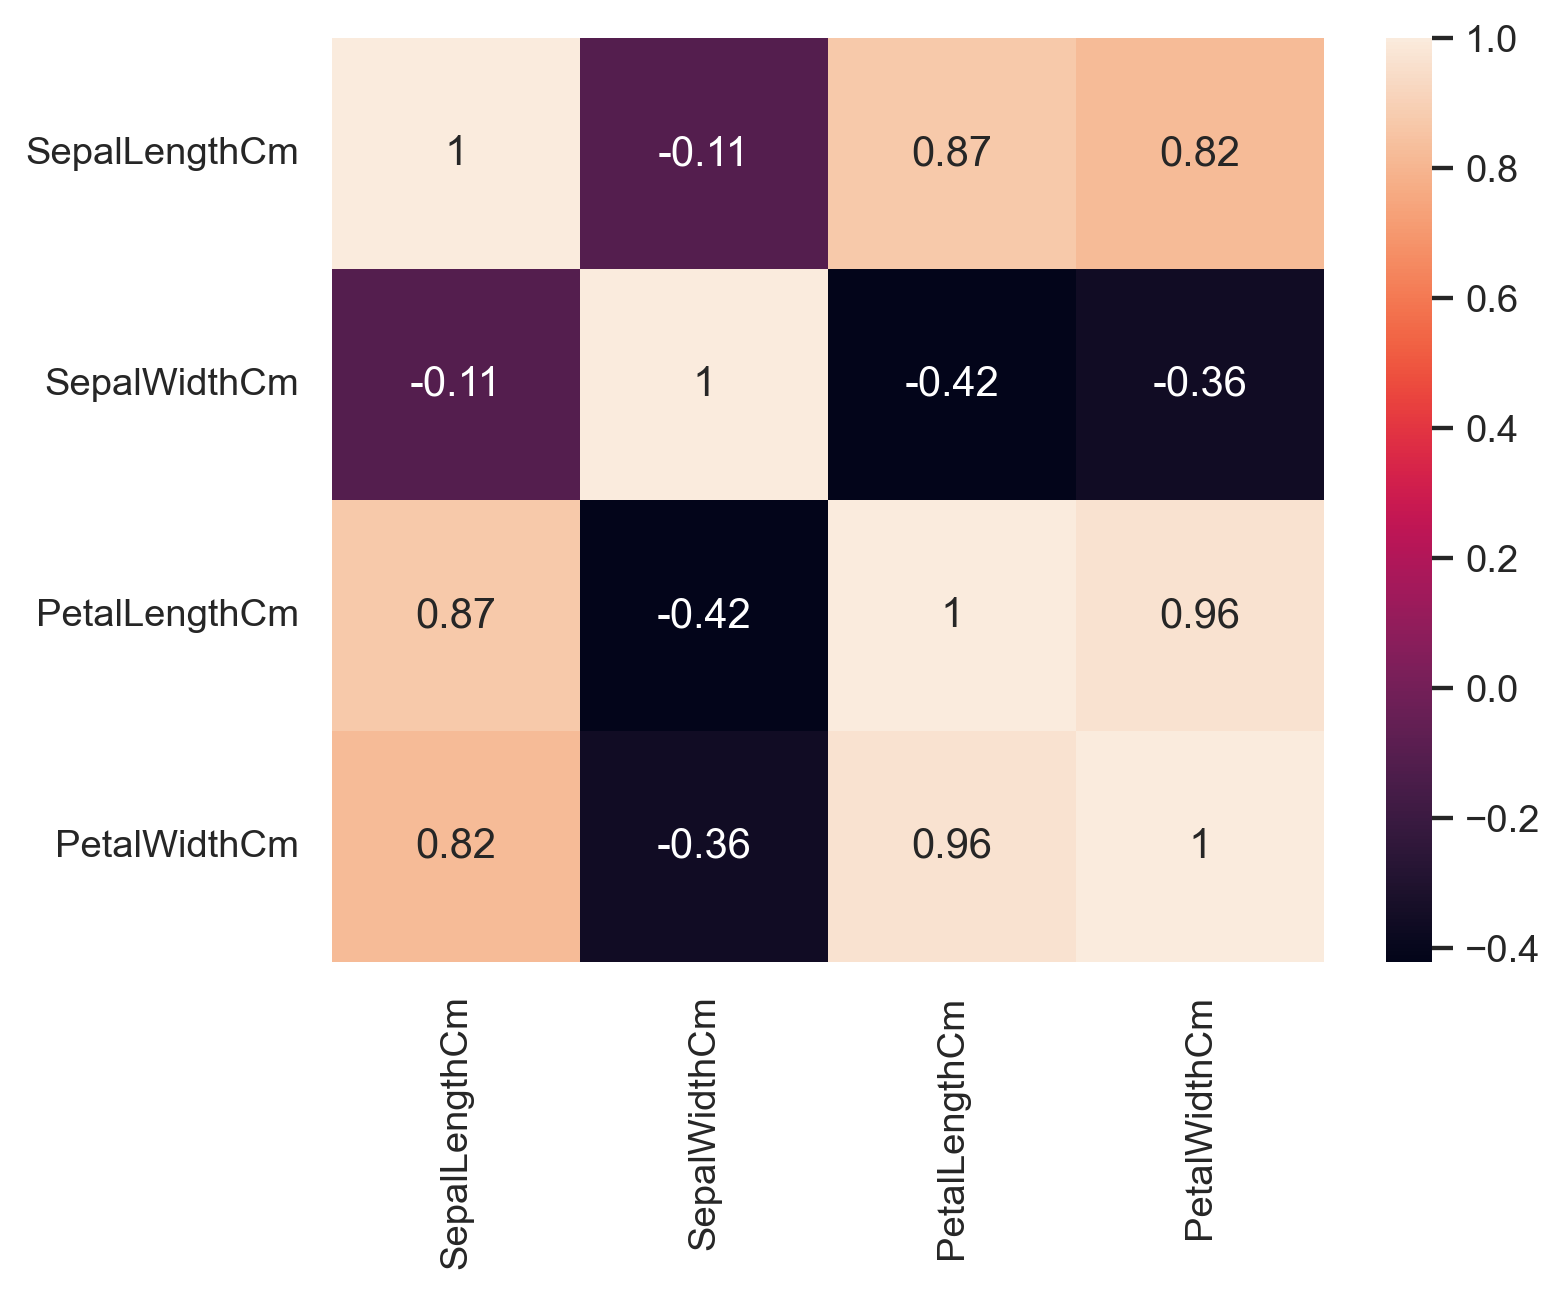

In [18]:
# heatmap to visualiza the realtionship

sns.heatmap(df.corr(numeric_only=True), annot=True)

# DATA TRANSFORMATION

In [19]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
x = df.iloc[:, 0:4]
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


In [21]:
sc = StandardScaler()
x_standard = sc.fit_transform(x)
x_standard = pd.DataFrame(x_standard, columns=x.columns)
x_standard

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.915509,1.019971,-1.357737,-1.335700
1,-1.157560,-0.128082,-1.357737,-1.335700
2,-1.399610,0.331139,-1.414778,-1.335700
3,-1.520635,0.101529,-1.300696,-1.335700
4,-1.036535,1.249582,-1.357737,-1.335700
...,...,...,...,...
142,1.020892,-0.128082,0.809831,1.444682
143,0.536792,-1.276136,0.695748,0.915085
144,0.778842,-0.128082,0.809831,1.047484
145,0.415766,0.790361,0.923913,1.444682


In [22]:
y = df.loc[:, 'Species']
y

Id
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
            ...      
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
150    Iris-virginica
Name: Species, Length: 147, dtype: object

# MODLEL BUILDING

In [23]:
# splitting data into trainning and testing part

xtrain, xtest, ytrain, ytest = train_test_split(x_standard, y, train_size=0.80, random_state=42)

In [24]:
# model building and training(fitting)

dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [25]:
# getting predictions

ypred = dt.predict(xtest)
ypred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [28]:
#  predicted data(labels) for those rows that were selected for testing in train_test_split

just_check = ypred.copy()
just_check = pd.DataFrame(just_check, columns=['Predicted_Species'])
just_check

,Predicted_Species
0,Iris-virginica
1,Iris-versicolor
2,Iris-virginica
3,Iris-setosa
4,Iris-versicolor
5,Iris-setosa
6,Iris-versicolor
7,Iris-setosa
8,Iris-virginica
9,Iris-setosa
